In [1]:
from rubin_sim.phot_utils import Sed, Bandpass
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Read in LSST, SDSS, and Johnson filter curves

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = os.path.join(fdir, 'throughputs')

# Read the throughput curves
lsst = {}
for f in 'ugrizy':
    lsst[f] = Bandpass()
    lsst[f].read_throughput(os.path.join(fdir, 'baseline', f'total_{f}.dat'))
    lsst[f].sb_tophi()

sdss = {}
for f in 'ugriz':
    sdss[f] = Bandpass()
    sdss[f].read_throughput(os.path.join(fdir, 'sdss', 'doi_%s.dat' % f))
    sdss[f].sb_tophi()

johnson = {}
for f in 'UBV':
    johnson[f] = Bandpass()
    johnson[f].read_throughput(os.path.join(fdir, 'johnson', 'johnson_%s.dat' % f))
    johnson[f].sb_tophi()

Text(0.5, 1.0, 'lsst')

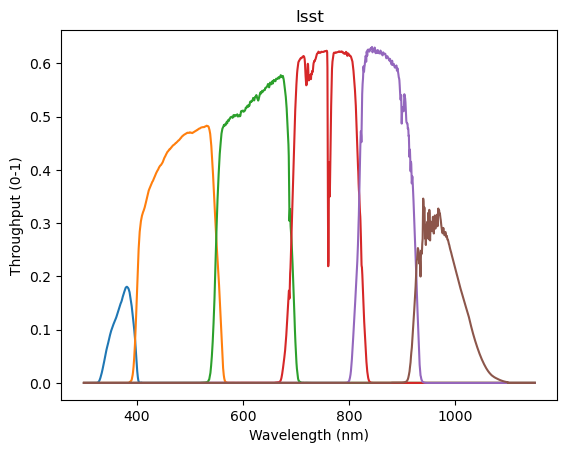

In [3]:
# check how things look
fig, ax = plt.subplots()
for key in lsst:
    ax.plot(lsst[key].wavelen, lsst[key].sb)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Throughput (0-1)')
ax.set_title('lsst')

Text(0.5, 1.0, 'sdss')

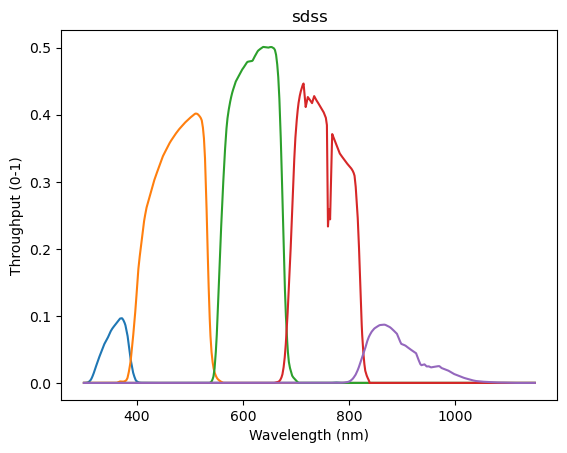

In [4]:
fig, ax = plt.subplots()
for key in sdss:
    ax.plot(sdss[key].wavelen, sdss[key].sb)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Throughput (0-1)')
ax.set_title('sdss')

Text(0.5, 1.0, 'johnson')

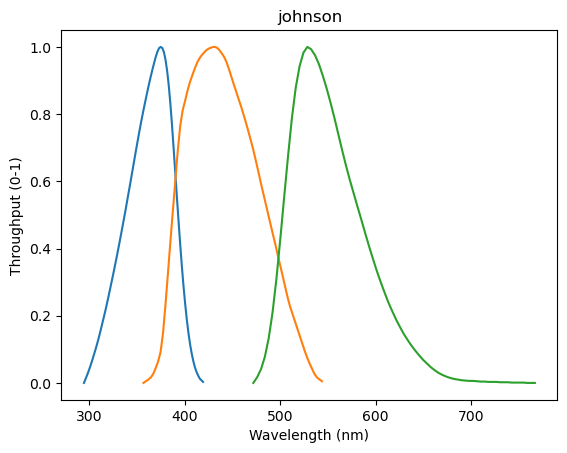

In [5]:
fig, ax = plt.subplots()
for key in johnson:
    ax.plot(johnson[key].wavelen, johnson[key].sb)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Throughput (0-1)')
ax.set_title('johnson')


In [6]:
# Make an SED that is constant in f_lambda
wave = np.arange(290,1200,0.1)
flam = wave*0 + 1e-8
sed = Sed(wavelen=wave, flambda=flam)
# Could set to any SED, for now make it flat
#sed.set_flat_sed(wavelen_min=290)


In [7]:
mags = {}
for key in lsst:
    mags[key] = sed.calc_mag(lsst[key])
print("LSST magnitudes", mags)

LSST magnitudes {'u': np.float64(2.241471761126956), 'g': np.float64(1.6918041199029235), 'r': np.float64(1.1275160621173956), 'i': np.float64(0.7026965474803699), 'z': np.float64(0.4010739191444621), 'y': np.float64(0.14793051286099868)}


In [8]:
mags = {}
for key in sdss:
    mags[key] = sed.calc_mag(sdss[key])
print("SDSS magnitudes", mags)

SDSS magnitudes {'u': np.float64(2.3152452008659976), 'g': np.float64(1.730981249012011), 'r': np.float64(1.138157384510703), 'i': np.float64(0.7178154548944242), 'z': np.float64(0.34413157518819304)}


In [9]:
mags = {}
for key in johnson:
    mags[key] = sed.calc_mag(johnson[key])
print("Johnson mags", mags)

Johnson mags {'U': np.float64(2.304194645170666), 'B': np.float64(1.8768286485161685), 'V': np.float64(1.38592344044348)}
